# Data management

## Econometrics with statsmodel

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malkaguillot/ECON2206-Data-Management-2023/HEAD?labpath=%2Fpractice%2F4.2-ML-regressions.ipynb)


## Case Study: Gender gap in earnings?

#### Question:
- Earning determined by many factor
- Is there a systematic wage differences between male and female workers?
$\Rightarrow$ **Objective**: Estimating gender and age differences in earnings  

#### Data: 
- Current Population Survey (CPS) of the U.S. for 2014
  - Administrative data
  - Sample restrictions ($N = 149, 316$):
    - Individuals age 16-65
    - Employed (has earnings)
    - Self- employed exluded


### Earnings variable
- Weakely earnings in CPS 
  - Before tax
  - Top-coded very hing earnings
    - at \$ $2,884.6$ (2.5\% of earnings in 2014)
- Need to control for hours worked
  - Women's working hours systematically differ from men's 
  - Divide weekly earnings by 'usual' weekly hours 

##### Learning objectives of this notebook
- Introduction to regression analysis in python using `statsmodels`
    - Focusing on linear regressions
 
- Interpretation of 
  - regression coefficients
  - standard errors / confidence intervals
  - $R^2$ 

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML

warnings.filterwarnings("ignore")

## Load data

In [2]:
data_file="morg-2014-emp.csv"
df = pd.read_csv(data_file)
df.columns

Index(['Unnamed: 0', 'hhid', 'intmonth', 'stfips', 'weight', 'earnwke',
       'uhours', 'grade92', 'race', 'ethnic', 'age', 'sex', 'marital',
       'ownchild', 'chldpres', 'prcitshp', 'state', 'ind02', 'occ2012',
       'class', 'unionmme', 'unioncov', 'lfsr94'],
      dtype='object')

#### Further sample restrictions:
- Employees usually working more than 20 hours a week
- Age between 24 and 64
- With positive earnings
- Education higher that a 4-year college

In [3]:
# Select sample
dim = df.shape # initial shape
df = df.query("uhours>=20 & earnwke>0 & age>=24 & age<=64 & grade92>=44")
print("We remove {} observations. We now work on {} observations.".format(dim[0] - df.shape[0],df.shape[0]))

We remove 131075 observations. We now work on 18241 observations.


In [4]:
# Create variales
df["female"] = (df["sex"] == 2)
df["w"] = df["earnwke"] / df["uhours"]
df["lnw"] = np.log(df["w"])
df["agesq"] = np.power(df["age"], 2)

In [5]:
# Distribution of earnings
df.loc[:, ["earnwke", "uhours", "w"]].describe()

,earnwke,uhours,w
count,18241.00000,18241.000000,18241.000000
mean,1481.78936,42.970780,34.525791
std,747.92426,9.139368,16.654215
min,0.01000,20.000000,0.000200
25%,923.00000,40.000000,21.634500
50%,1346.00000,40.000000,31.250000
75%,1923.07000,47.000000,45.673000
max,2884.61000,99.000000,144.230500


## Linear regressions

### Simple regression with one explanatory variable 

$$\ln(wage) = \alpha + \beta \texttt{Female} + \epsilon $$

In [6]:
# 0LS estimation
reg1 = smf.ols(formula="lnw~female", data=df).fit(cov_type="HC1")
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     531.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.96e-116
Time:                        17:24:59   Log-Likelihood:                -15672.
No. Observations:               18241   AIC:                         3.135e+04
Df Residuals:                   18239   BIC:                         3.136e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5145      0.006    573.388      0.000       3.502       3.526
female[T.True]    -0.1953      0.008    -23.055      0.000      -0.212      -0.179
==============================================================================
Omnibus:                    15252.403   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1835979.169
Skew:                          -3.402   Prob(JB):                         0.00
Kurtosis:                      51.676   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

#### Interpretation
In the USA (2014), women tend to earn about 20% less than men.

<div class="alert alert-info">
<h3> Your turn: run the ols regression of the ln wage on the age </h3>

Call this new regression `reg2`.
</div>

In [7]:
reg2 = smf.ols(formula="lnw~age", data=df).fit(cov_type="HC1")
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lnw   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     387.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.88e-85
Time:                        17:24:59   Log-Likelihood:                -15746.
No. Observations:               18241   AIC:                         3.150e+04
Df Residuals:                   18239   BIC:                         3.151e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0739      0.017    178.176      0.000       3.040       3.108
age            0.0077      0.000     19.694      0.000       0.007       0.008
==============================================================================
Omnibus:                    15235.765   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1814562.722
Skew:                          -3.399   Prob(JB):                         0.00
Kurtosis:                      51.386   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

### Graphical representation

In [8]:
#pip install scikit-misc 

In [9]:
from plotnine import *
from scipy.stats import norm
color = ["#3a5e8cFF", "#10a53dFF", "#541352FF", "#ffcf20FF", "#2f9aa0FF"]


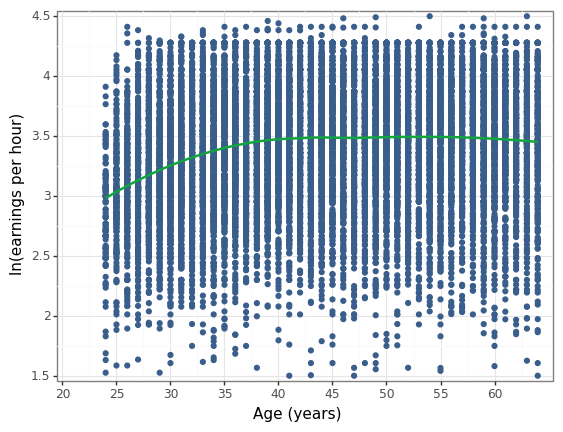

<ggplot: (702471553)>

In [10]:
(
    ggplot(df, aes(x="age", y="lnw"))
    + geom_point(color=color[0])
    + geom_smooth(method="loess", color=color[1], se=False)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(20, 65), breaks=range(20, 65, 5))
    + scale_y_continuous(
        expand=(0.01, 0.01), limits=(1.5, 4.5), 
    )
    + labs(x="Age (years)", y="ln(earnings per hour)")
    + theme_bw()
)


### Displaying regression results

In [11]:
#pip install stargazer

In [12]:
from stargazer.stargazer import Stargazer
stargazer = Stargazer([reg1, ])
stargazer.custom_columns(["ln wage"], [1])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer

## Multiple regression with several explanatory variables
$$y_i = \alpha + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \beta_3 x_{i,3}  + \epsilon_i $$

- $\beta_1 =$ the slope coefficient on $x_1$ shows difference in average $y$ across observations with unit difference in $x_1$, but the same value of $x_2$ and $x_3$. 
  
- Can compare observations that are similar in one explanatory variable to see the differences related to the other explanatory variable.

### Gender wage gap
Compare wages for men and women who share similarities in wage relevant factors
such as experience.

$$\ln(wage) = \alpha + \beta_1 \texttt{Female} + \beta_2 \texttt{Age} + \epsilon $$

In [13]:
reg2 = smf.ols(formula="lnw~female+age", data=df).fit(cov_type="HC1")
reg3 = smf.ols(formula="lnw~female+age+agesq", data=df).fit(cov_type="HC1")

In [14]:
from stargazer.stargazer import Stargazer
stargazer = Stargazer([reg1, reg2, reg3])
stargazer.custom_columns(["ln(wage)", "ln(wage)", "ln(wage)"], [1, 1, 1])
stargazer.rename_covariates({"Intercept": "Constant", 'female[T.True]':'Female', 'age':'Age', 'agesq':'Age squared'})
stargazer.covariate_order(["female[T.True]", "age", "agesq", "Intercept"])
stargazer

In [15]:
df["ed_MA"] = (df["grade92"] == 44).astype(int)
df["ed_Profess"] = (df["grade92"] == 45).astype(int)
df["ed_Phd"] = (df["grade92"] == 46).astype(int)

In [16]:
reg4 = smf.ols(formula="lnw~female + age + agesq + ed_Profess + ed_Phd", data=df).fit(cov_type="HC1")

reg5 = smf.ols(formula="lnw~female+ age + agesq  + ed_Profess + ed_MA", data=df).fit(cov_type="HC1")

In [17]:
from stargazer.stargazer import Stargazer
stargazer = Stargazer([reg1, reg3, reg4, reg5])
stargazer.rename_covariates({"Intercept": "Constant", 'female[T.True]':'Female', 'age':'Age', 'agesq':'Age squared'})
stargazer.covariate_order(["female[T.True]", "ed_Profess", "ed_Phd", "ed_MA", "age", "agesq", "Intercept"])
stargazer

In [18]:
# Potentially endogeneous demographics
df["married"] = ((df["marital"] == 1) | (df["marital"] == 2)).astype(int)
df["divorced"] = ((df["marital"] == 3) & (df["marital"] == 5)).astype(int)
df["wirowed"] = (df["marital"] == 4).astype(int)
df["nevermar"] = (df["marital"] == 7).astype(int)

df["child0"] = (df["chldpres"] == 0).astype(int)
df["child1"] = (df["chldpres"] == 1).astype(int)
df["child2"] = (df["chldpres"] == 2).astype(int)
df["child3"] = (df["chldpres"] == 3).astype(int)
df["child4pl"] = (df["chldpres"] >= 4).astype(int)

# Work-related variables
df["fedgov"] = (df["class"] == "Government - Federal").astype(int)
df["stagov"] = (df["class"] == "Government - State").astype(int)
df["locgov"] = (df["class"] == "Government - Local").astype(int)
df["nonprof"] = (df["class"] == "Private, Nonprofit").astype(int)
df["ind2dig"] = ((pd.Categorical(df["ind02"]).codes + 1) / 100).astype(int)
df["occ2dig"] = (df["occ2012"] / 100).astype(int)
df["union"] = ((df["unionmme"] == "Yes") | (df["unioncov"] == "Yes")).astype(int)

In [19]:
df["agesq"] = np.power(df["age"], 2)
df["agecu"] = np.power(df["age"], 3)
df["agequ"] = np.power(df["age"], 4)

In [20]:
df["uhourssq"] = np.power(df["uhours"], 2)
df["uhourscu"] = np.power(df["uhours"], 3)
df["uhoursqu"] = np.power(df["uhours"], 4)

In [21]:
df["white"] = (df["race"] == 1).astype(int)
df["afram"] = (df["race"] == 2).astype(int)
df["asian"] = (df["race"] == 4).astype(int)
df["hisp"] = (df["ethnic"].notna()).astype(int)
df["othernonw"] = (
    (df["white"] == 0) & (df["afram"] == 0) & (df["asian"] == 0) & (df["hisp"] == 0)
).astype(int)
df["nonUSborn"] = (
    (df["prcitshp"] == "Foreign Born, US Cit By Naturalization")
    | (df["prcitshp"] == "Foreign Born, Not a US Citizen")
).astype(int)

In [22]:
reg5 = smf.ols(
    formula="lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig)",
    data=df,
).fit(cov_type="HC1")
reg6 = smf.ols(
    formula="lnw ~ female + age + afram + hisp + asian + othernonw + nonUSborn + ed_Profess + ed_Phd + married + divorced+ wirowed + child1 + child2 + child3 +child4pl + C(stfips) + uhours + fedgov + stagov + locgov + nonprof + union + C(ind2dig) + C(occ2dig) + agesq + agecu + agequ + uhoursqu + uhourscu + uhourssq",
    data=df,
).fit(cov_type="HC1")

In [23]:
stargazer = Stargazer([reg1, reg4, reg5, reg6])
stargazer.covariate_order(["female[T.True]"])
stargazer.add_line("Age and education", ["", "Yes", "Yes", "Yes"])
stargazer.add_line("Family circumstances", ["", "", "Yes", "Yes"])
stargazer.add_line("Demographic background", ["", "", "Yes", "Yes"])
stargazer.add_line("Job characteristics", ["", "", "Yes", "Yes"])
stargazer.add_line("Age in polynomial", ["", "", "", "Yes"])
stargazer.add_line("Hours in polynomial", ["", "", "", "Yes"])
stargazer

